In [6]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
import scipy.io.wavfile as wave

/var/folders/w0/zsfw_h_n5wg43l1yl83j97kr0000gn/T/ipykernel_2449/3767607945.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  x1[n] = np.exp(1j*w0*n)


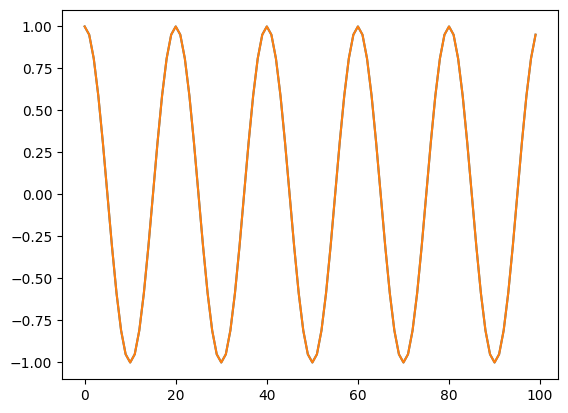

In [215]:
# INIT 
N = 100
w0 = 0.1 * np.pi

x1 = np.zeros(N)
x2 = np.zeros(N)

for n in range(N):
    x1[n] = np.exp(1j*w0*n)
    x2[n] = np.cos(w0*n)

plt.plot(x1)
plt.plot(x2)
plt.show()

In [22]:
def dftKPoint(K, x):
    N = len(x)
    X = np.zeros(K, dtype=np.complex128)

    for k in range(K):
        wk = 2 * np.pi * k/K
        for n in range(N):
            X[k] += x[n] * np.exp(-1j*wk*n)

    return X

a. Using a computer, compute the K-point amplitude spectra of x1(n) and x2(n).
Experiment with the size of K. Start with a value of K = N and increase it. What
changes when you change K? Why?

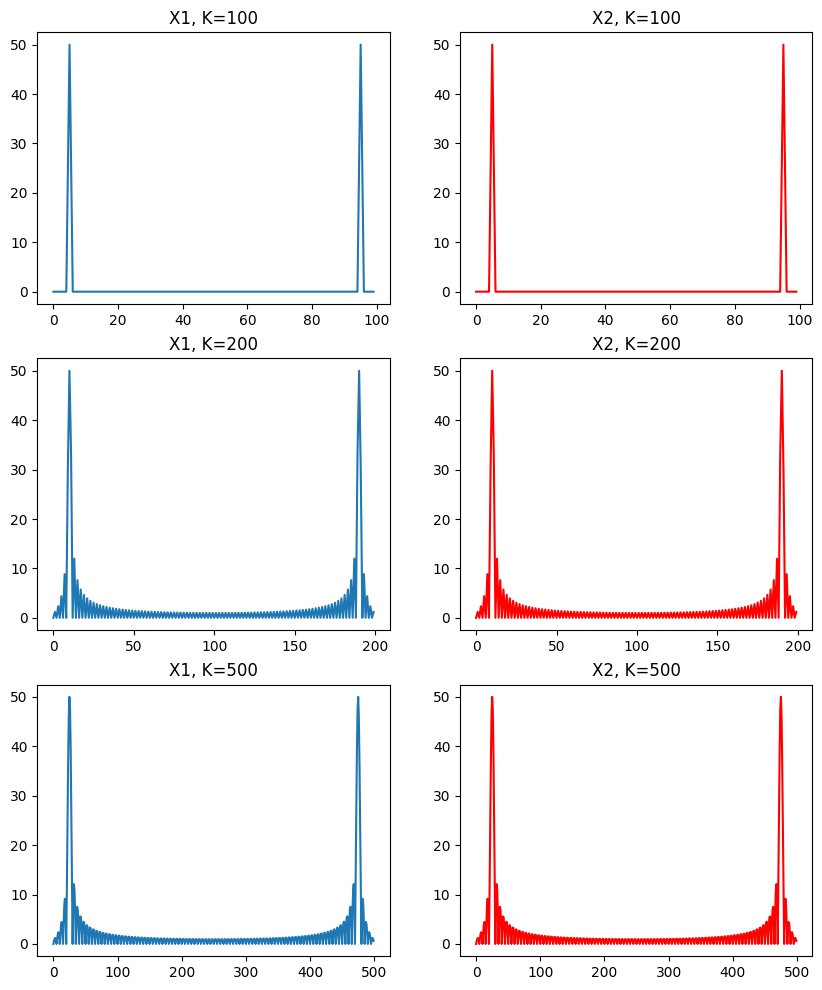

In [52]:
kPoint = np.array([N, N * 2, N * 5], dtype=int)
kPointLen = len(kPoint)

plt.figure(figsize=(10,4 * kPointLen))

for idx, K in enumerate(kPoint):

    X1 = dftKPoint(K, x1)
    plt.subplot(3, 2, idx*2+1)
    plt.plot(np.abs(X1)) 
    plt.title("X1, K={}".format(K))

    X2 = dftKPoint(K, x2)
    plt.subplot(3, 2, idx*2+2)
    plt.plot(np.abs(X2), color='red')

    plt.title("X2, K={}".format(K))

plt.show() 


We now consider the trumpet signal trumpet.wav which you can find on Moodle.

b. Using a computer, compute the K-point amplitude spectrum of the trumpet sig-
nal. What can you say about the trumpet signal? Which model is appropriate for
describing such a trumpet signal?

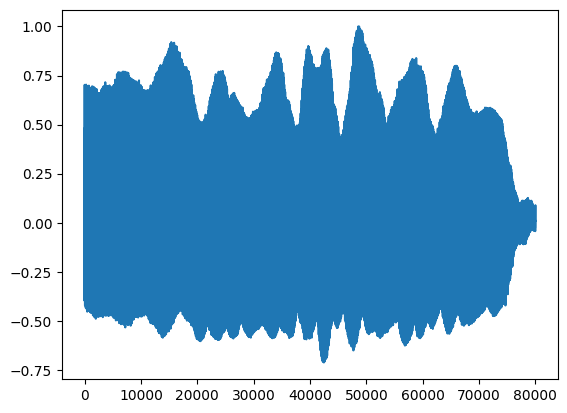

In [50]:
fs, trumpet = wave.read('../03-Fourier-Transfom/data/trumpet.wav')
trumpet = trumpet / np.max(np.abs(trumpet))
plt.plot(trumpet)

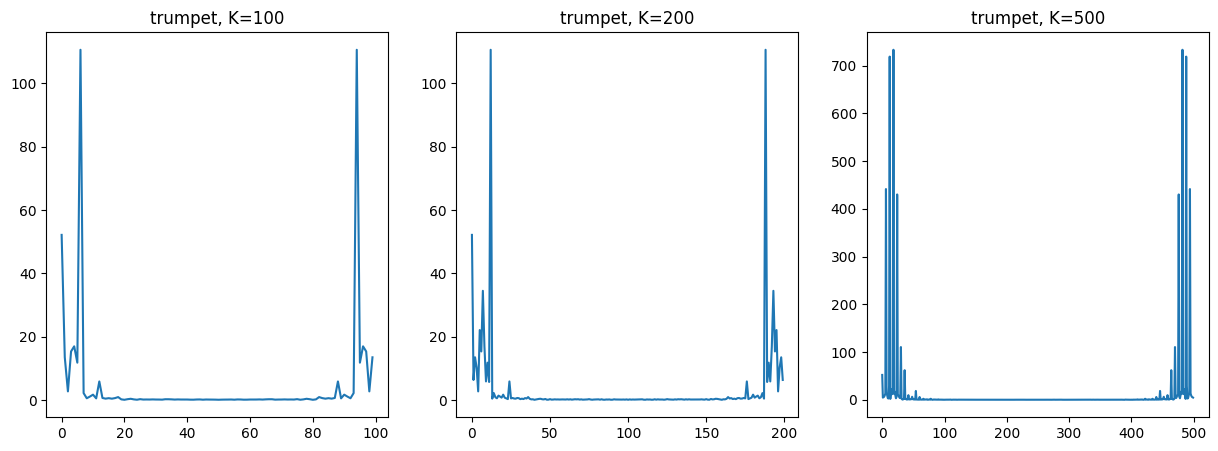

In [55]:
plt.figure(figsize=(15,5))

for idx, K in enumerate(kPoint):
    trumpetDFT = dftKPoint(K, trumpet)
    plt.subplot(1, 3, idx+1)
    plt.plot(np.abs(trumpetDFT)) 
    plt.title("trumpet, K={}".format(K))

plt.show() 


### Exercise 2.2
Linear convolution between two sequences x(n) and h(n) can be performed in both the
time- and the frequency-domain. 

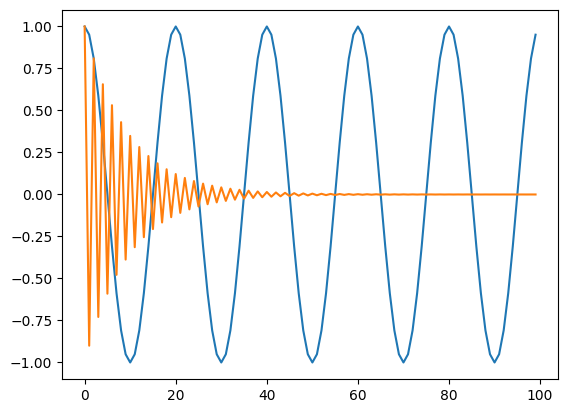

In [164]:
# INIT 
N2 = 10
w02 = 1.1
a = -0.9

x = np.zeros(N)
h = np.zeros(N)

for n in range(N):
    x[n] = np.cos(w0*n)
    h[n] = a**n

plt.plot(x)
plt.plot(h)
plt.show()

2.2. a. Compute convolution in the time-domain by summation

In [165]:
def convolve_time_domain(x,h):
    N = len(x)
    L = len(h)
    y = np.zeros(N)

    for n in range(N):
        for m in range(n+1):
            y[n] += x[m]*h[n-m]
    
    return y

In [166]:
y_time_domain_convo = convolve_time_domain(x,h)

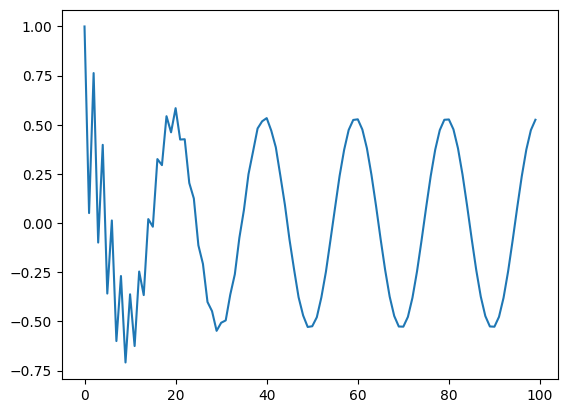

In [167]:
plt.plot(y_time_domain_convo)
plt.show()

b. Do the convolution in the frequency domain via two FFTs and one iFFT

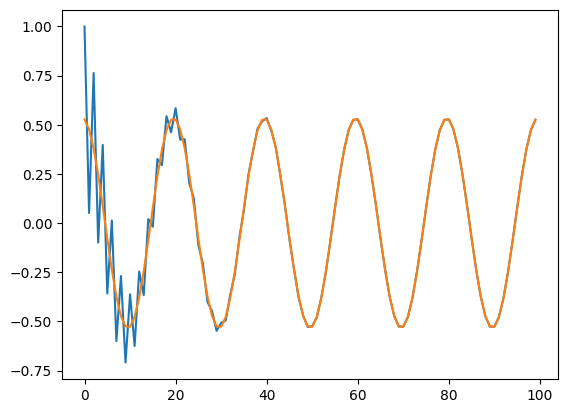

In [214]:
y_freq_domain_convo = np.fft.ifft(np.fft.fft(x) * np.fft.fft(h))

plt.plot(y_time_domain_convo)
plt.plot(y_freq_domain_convo)
plt.show()

c. Now form the convolution matrix H and compute the convolution via y=**H**x

In [194]:
from scipy.linalg import toeplitz

assert(len(h) == len(x) == N) # len(h) = len(x) = N
K = len(h) + len(x) - 1

hzp = np.pad(h, (0, K - N), 'constant') # Zero-pad h to length K
xzp = np.pad(x, (0, K - N), 'constant') # Zero-pad x to length K

h_col = hzp
h_row = np.r_[hzp[0], np.flip(hzp[1:])]

H = toeplitz(h_col, h_row)
y_matrix_H_convo = H @ xzp



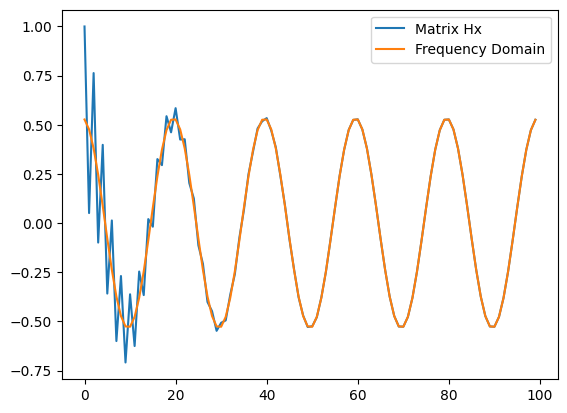

In [195]:
plt.plot(y_matrix_H_convo[:N], label="Matrix Hx")
plt.plot(y_freq_domain_convo, label="Frequency Domain")
plt.legend()
plt.show()


d. Now form the DFT matrix and implement the convolution in the frequency domain via matrix-vector algebra

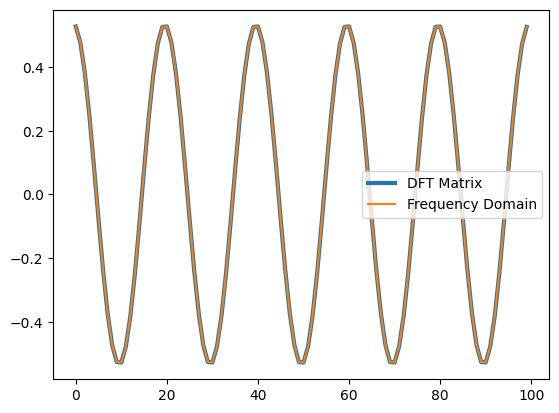

In [202]:
from scipy.linalg import dft

W = dft(N) # define NxN DFT matrix

x_fft_mat = W @ x
h_fft_mat = W @ h

y_dft_matrix_convo = np.fft.ifft(x_fft_mat * h_fft_mat)

plt.plot(y_dft_matrix_convo, linewidth=3, label="DFT Matrix")
plt.plot(y_freq_domain_convo, label="Frequency Domain")
plt.legend()
plt.show()

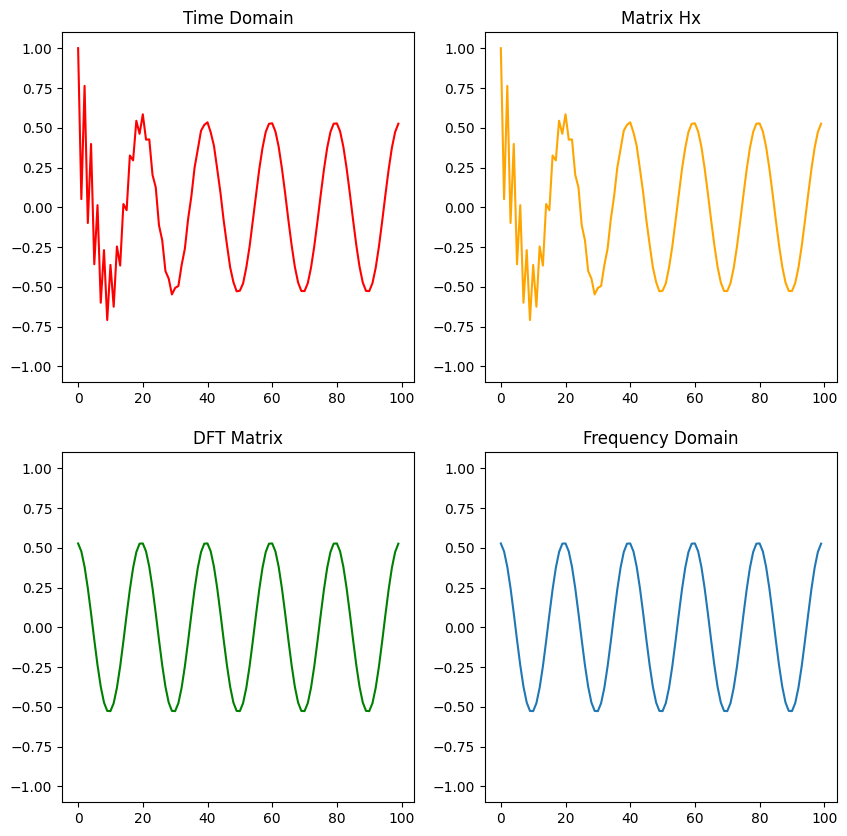

In [213]:
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.plot(y_time_domain_convo,color="red")
plt.title("Time Domain")
plt.ylim(-1.10,1.10)

plt.subplot(2,2,2)
plt.plot(y_matrix_H_convo[:N], color="orange")
plt.title("Matrix Hx")
plt.ylim(-1.10,1.10)

plt.subplot(2,2,3)
plt.plot(y_dft_matrix_convo, color="green")
plt.title("DFT Matrix")
plt.ylim(-1.10,1.10)

plt.subplot(2,2,4)
plt.plot(y_freq_domain_convo)
plt.title("Frequency Domain")
plt.ylim(-1.10,1.10)

plt.show()

### Questions after exercises:
1. How to run inverse dft with a use of DFT Matrix?
2. Why are time domain results different from frequency domain results? Why is the math saying that it is the same but we get some differences at the beginig of the signal? Is that just ignored????